In [1]:
import numpy as np 
import pandas as pd 
from glob import glob
import os
import PIL
import tensorflow as tf
import pathlib 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
all_faces = glob(r"C:\Users\User\Desktop\vrinda\project1\faces\*\*")
all_faces

['C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_0.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_1.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_100.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_1000.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10000.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10001.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10002.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10003.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10004.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10005.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10006.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\\man\\man_10007.jpg',
 'C:\\Users\\User\\Desktop\\vrinda\\project1\\faces\

In [3]:
image_count = len(list(all_faces))
print(image_count)

27167


In [4]:
batch_size = 64
num_classes = 2
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/User/Desktop/vrinda/project1/faces',
                                                               validation_split=0.25,
                                                               subset="training",
                                                               seed=123,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/User/Desktop/vrinda/project1/faces',
                                                               validation_split=0.25,
                                                               subset="validation",
                                                               seed=123,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 27167 files belonging to 2 classes.
Using 20376 files for training.
Found 27167 files belonging to 2 classes.
Using 6791 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['man', 'woman']


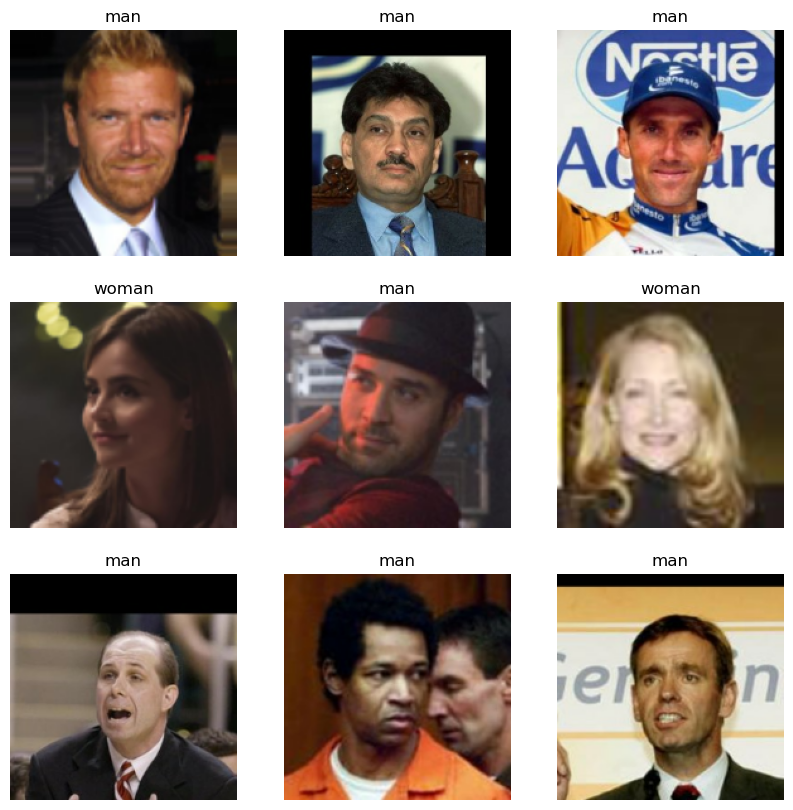

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off");

## First CNN

In [8]:
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width,3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])


C:\Users\User\Downloads\ano\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

filepath = 'model_1.keras'  # Corrected filepath
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch"
)


In [11]:
epochs = 15 
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs,
                    verbose = 1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 298s 923ms/step - accuracy: 0.7073 - loss: 0.5729 - val_accuracy: 0.8470 - val_loss: 0.3569
Epoch 2/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 288s 901ms/step - accuracy: 0.8550 - loss: 0.3365 - val_accuracy: 0.8841 - val_loss: 0.2747
Epoch 3/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 290s 906ms/step - accuracy: 0.8870 - loss: 0.2670 - val_accuracy: 0.8906 - val_loss: 0.2622
Epoch 4/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 289s 903ms/step - accuracy: 0.9097 - loss: 0.2239 - val_accuracy: 0.8980 - val_loss: 0.2703
Epoch 5/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 291s 910ms/step - accuracy: 0.9268 - loss: 0.1853 - val_accuracy: 0.9043 - val_loss: 0.2649
Epoch 6/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 239s 745ms/step - accuracy: 0.9393 - loss: 0.1508 - val_accuracy: 0.8954 - val_loss: 0.2886


In [12]:
model1_acc = model.evaluate(val_ds)[1]
model1_acc

107/107 ━━━━━━━━━━━━━━━━━━━━ 27s 247ms/step - accuracy: 0.8920 - loss: 0.2533


0.890590488910675

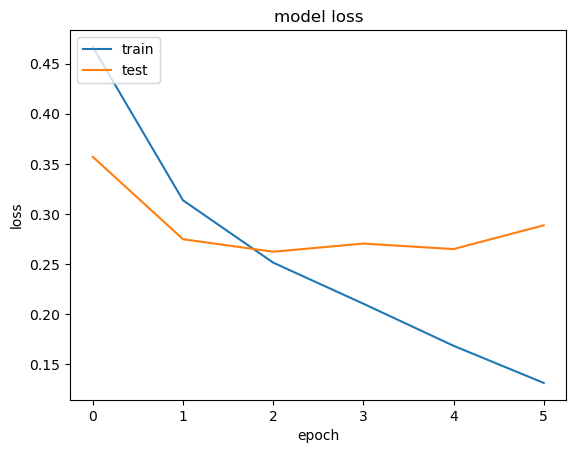

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

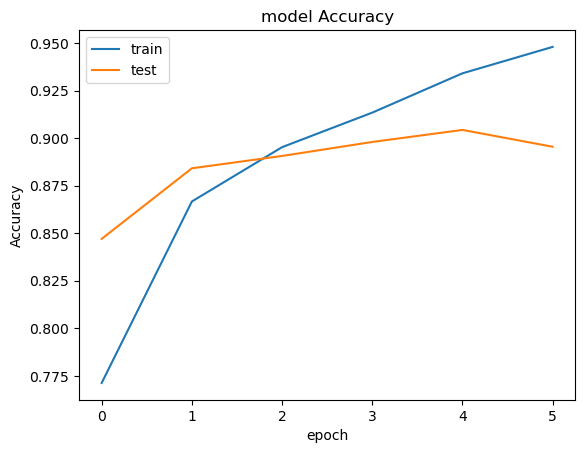

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Second CNN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
filepath = 'model_2.keras'


In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

filepath = 'model_2.keras'  # Update the filepath to end with .keras
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch",
)


In [19]:
epochs = 15 
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs,
                    verbose = 1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1006s 3s/step - accuracy: 0.6741 - loss: 0.5989 - val_accuracy: 0.8330 - val_loss: 0.3844
Epoch 2/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1010s 3s/step - accuracy: 0.8190 - loss: 0.3938 - val_accuracy: 0.8703 - val_loss: 0.2968
Epoch 3/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 998s 3s/step - accuracy: 0.8702 - loss: 0.2977 - val_accuracy: 0.8984 - val_loss: 0.2466
Epoch 4/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1001s 3s/step - accuracy: 0.8999 - loss: 0.2425 - val_accuracy: 0.9130 - val_loss: 0.2109
Epoch 5/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 997s 3s/step - accuracy: 0.9196 - loss: 0.1983 - val_accuracy: 0.9221 - val_loss: 0.2030
Epoch 6/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 990s 3s/step - accuracy: 0.9296 - loss: 0.1748 - val_accuracy: 0.9258 - val_loss: 0.1873
Epoch 7/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 995s 3s/step - accuracy: 0.9453 - loss: 0.1434 - val_accuracy: 0.9255 - val_loss: 0.1976
Epoch 8/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1005s 3s/step - accuracy: 0.9518 - loss: 0.1249 - val_

In [20]:
model2_acc = model.evaluate(val_ds)[1]
model2_acc

107/107 ━━━━━━━━━━━━━━━━━━━━ 83s 765ms/step - accuracy: 0.9239 - loss: 0.1844


0.9257841110229492

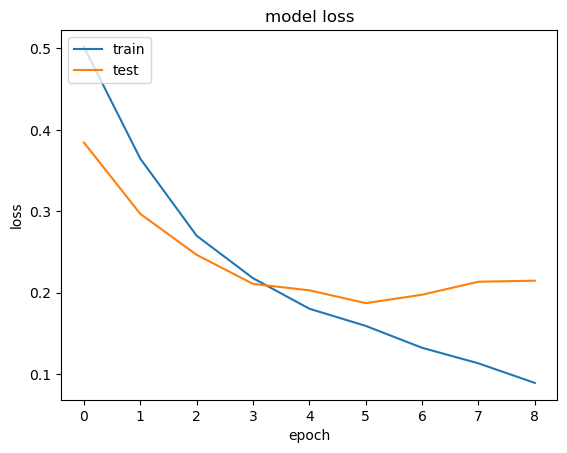

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

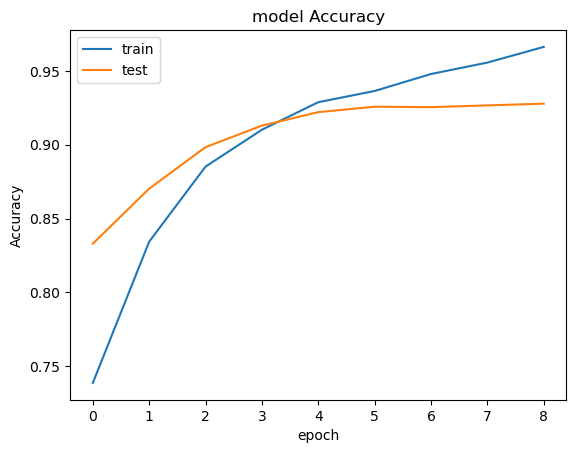

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Third CNN

In [23]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  mode='min',
                                                  restore_best_weights=True
                                                 )

filepath = 'model_3.keras'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode="min",
                                                      save_freq="epoch",
                                                    )

In [26]:
epochs = 15
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs,
                    verbose = 1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1231s 4s/step - accuracy: 0.6757 - loss: 0.6039 - val_accuracy: 0.7800 - val_loss: 0.4438
Epoch 2/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1245s 4s/step - accuracy: 0.7816 - loss: 0.4452 - val_accuracy: 0.8365 - val_loss: 0.3546
Epoch 3/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1240s 4s/step - accuracy: 0.8310 - loss: 0.3676 - val_accuracy: 0.8857 - val_loss: 0.2775
Epoch 4/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1340s 4s/step - accuracy: 0.8814 - loss: 0.2794 - val_accuracy: 0.9196 - val_loss: 0.1989
Epoch 5/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1451s 5s/step - accuracy: 0.9078 - loss: 0.2298 - val_accuracy: 0.9296 - val_loss: 0.1861
Epoch 6/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1442s 5s/step - accuracy: 0.9222 - loss: 0.1970 - val_accuracy: 0.9330 - val_loss: 0.1687
Epoch 7/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1448s 5s/step - accuracy: 0.9354 - loss: 0.1694 - val_accuracy: 0.9351 - val_loss: 0.1655
Epoch 8/15
319/319 ━━━━━━━━━━━━━━━━━━━━ 1482s 5s/step - accuracy: 0.9394 - loss: 0.1543 - 

In [27]:
model3_acc = model.evaluate(val_ds)[1]
model3_acc

107/107 ━━━━━━━━━━━━━━━━━━━━ 101s 943ms/step - accuracy: 0.9435 - loss: 0.1538


0.9447798728942871

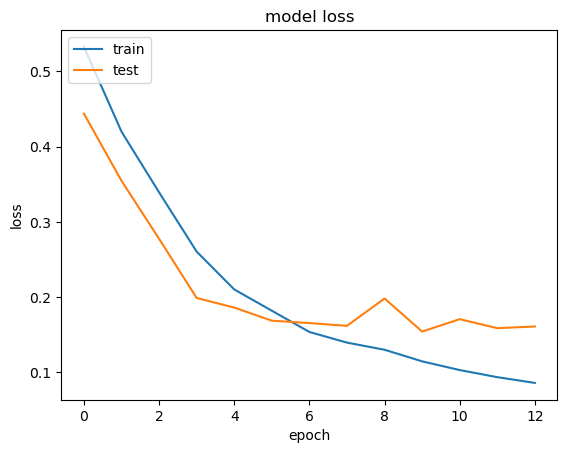

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

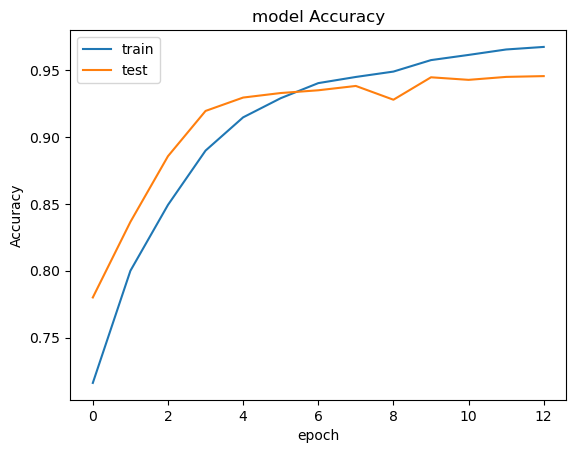

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#### Comparing Results

In [31]:
results = {'First_CNN' : model1_acc, 'Second_CNN' : model2_acc, 'Third_CNN' : model3_acc}
results

{'First_CNN': 0.890590488910675,
 'Second_CNN': 0.9257841110229492,
 'Third_CNN': 0.9447798728942871}

(0.87, 0.95)

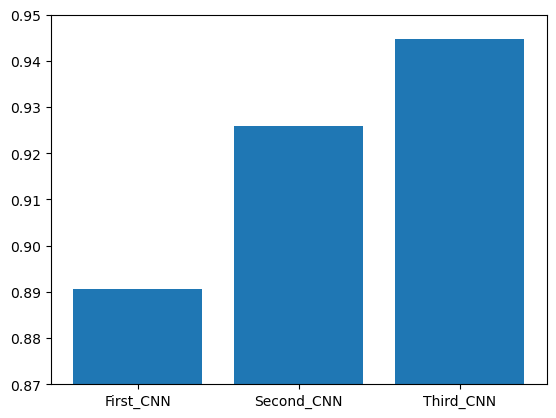

In [32]:
plt.bar(results.keys(), results.values())
plt.ylim(0.87, 0.95)